# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [1]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Question 1: /10 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 0])`.

Test your function by calling it with `lamb = np.array([1, 0.5, 2, 5])` and  `y = np.array([1.5, 2.1, 3.4, 0])`.

Answer in markdown:


* Explain what the function is doing if $\mathbf{\lambda}=(\lambda_i)$ and  $\mathbf{y}=(y_i)$. This is when the arguments are vectors.

* What happens when you set an element of lamb to 0 or a negative number. Why?

In [2]:
def exponentialNegLogLikelihood(lamb, y):
    neg_log_lik = - np.sum(np.log(lamb) - lamb*y)
    return neg_log_lik



display(exponentialNegLogLikelihood(np.array([1, 0.5, 2, 5]), np.array([1.5, 2.1, 3.4, 0])))

7.740562087565899

In [3]:
# Test the function
lamb = 2
y = np.array([1, 4, 6, 0])

display(exponentialNegLogLikelihood(lamb, y))

19.227411277760222

In [4]:
# What happens when you call the function with lamb=np.array([1,0.5,2,5]) and y=np.array([1.5,2.1,3.4,0])?
lamb=np.array([1,0.5,2,5])
y=np.array([1.5,2.1,3.4,0])

display(exponentialNegLogLikelihood(lamb, y))

7.740562087565899

In [5]:
# look what happens if $\lambda=0$.
lamb = 0
y = np.array([1,4,6,0])

display(exponentialNegLogLikelihood(lamb, y))

C:\Users\VBran\AppData\Local\Temp/ipykernel_13552/1286087806.py:2: RuntimeWarning: divide by zero encountered in log
  neg_log_lik = - np.sum(np.log(lamb) - lamb*y)


inf

In [6]:
# Look what happens if $\lambda$ is negative.
lamb = -1
y = np.array([1,4,6,0])

display(exponentialNegLogLikelihood(lamb, y))

C:\Users\VBran\AppData\Local\Temp/ipykernel_13552/1286087806.py:2: RuntimeWarning: invalid value encountered in log
  neg_log_lik = - np.sum(np.log(lamb) - lamb*y)


nan

**Written Answer:** 
1. When setting lamda and y to vectors the function iterates through both y and lambda and computes the sum at each iteration. For this reason, the two vectors must be of the same size, or at least one of them must be of size 1. 

2. When lamb is 0, it returns infinity. This is because as lambda approaches 0, ln(lambda) approaches negative infinity. Thus taking the negative of this returns negative infinity. When lamb is negative, it returns nan, meaning not a number. This is because the natural log of a negative number does not exist. 

---

### Question 2: /15 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [7]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    lamb = np.exp(-X@b)
    neg_log_lik = exponentialNegLogLikelihood(lamb, y)
    return neg_log_lik

In [8]:
# Test your function 
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])

display(exponentialRegressionNegLogLikelihood(b, X, y))

26.60556862451103

---
### Question 3: /10 Marks

a) In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?.


b) What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$?: 

No more than 2 lines for each answer.

**Written Answer:**

a) Could end up that lambda contains a negative number, thus we wouldnt be able to compute neg_log_like.

b) The exponential distribution is always positive. When lambda has the form exp(-Xb), it is always positive, thus the mean and variance of the exponential distribution are also always positive.

---
### Question 4: /5 Marks

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`

In [9]:
# Definition of the Prediction
def Prediction(b, X):
    yhat = np.exp(X@b)
    return yhat

In [10]:
# Test the function
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T

display(Prediction(b, X))

array([ 2980.95798704, 66171.16016838,  1808.04241446])

---
### Question 5: /15 Marks

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

Write the estimated coefficients $b$.

In [11]:
# Define Model_fit
def Model_fit(X, y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.zeros(X.shape[1])
    # Minimize the appropriate likelihood function
    mle = minimize(exponentialRegressionNegLogLikelihood, beta_start, args=(X,y))
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

In [12]:
# Show the code to find estimated b
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])

display(Model_fit(X, y))

array([ 1.13036676, -0.6760081 ])

### Question 6: /20 Mark(s)

Use the data `exponential_regression.csv` to fit a exponential regression using the functions that you already have created. In this data, $y$ is measured in time units. 

* What are the estimated coefficients?
* Plot a scatterplot of the data that includes the model prediction over $x \in [-2.14, 2.14]$. Do not forget to include a graph title.

In [13]:
# Loading in the data.
df = pd.read_csv("exponential_regression.csv", sep = ';')
#display(df.head())
# Create the design matrix
x = df.x.values 
X = X = np.c_[np.ones(x.size), x]
y = df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = Model_fit(X,y)

Text(0.5, 1.0, 'Exponential Fit')

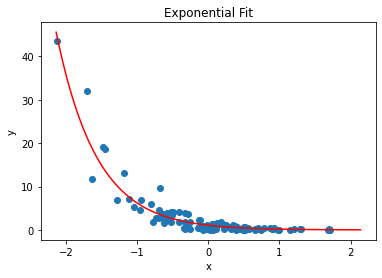

In [14]:
# Scatterplot the data. 
plt.scatter(x = df.x, y = df.y)
# Create the new data to graphic the prediction
newx = np.linspace(-2.14, 2.14, 1001)
newX = np.c_[np.ones(newx.size), newx]

# Predictions on the new data
y_predicted = Prediction(betas, newX)

#Finally, plot the predictions on the same graph
plt.plot(newX[:,1], y_predicted, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Fit')

### Question 7:  /20 Marks

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range.


Text(0.5, 1.0, 'Linear Fit')

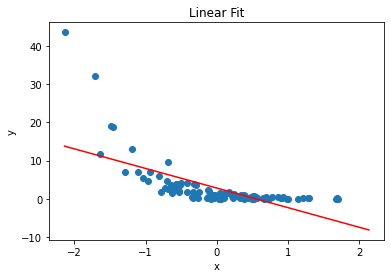

In [15]:
# fit the linear regression model
x = df.loc[:,'x'].values
X = np.c_[np.ones(x.size), x]
y = df.loc[:,'y'].values
ols_fit = LinearRegression().fit(X, y)

# Make predictions on the new data
newx = np.linspace(-2.14, 2.14, 1001)
newX = np.c_[np.ones(newx.size), newx]
y_predicted = ols_fit.predict(newX)

# Plot a scatter plot of the data and your model's predictions
plt.scatter(x, y)
plt.plot(newX[:,1], y_predicted, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')

### Question 8: /5 Mark(s)

Between this two models which one would you select? What is the major problem with predictions from linear regression? Remember that in this case $y$ is measured in time units.

**Written answer:** I would select the exponential model. The major problem with the linear model is that it predicts y values below the x axis. This would be a negative time value which is not possible.


### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.